In [278]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special

In [279]:
def f(x):
    if x <= 0.5:
        return np.sin(x*3)
    else:
        return np.sin((1-x)*3)


In [280]:
def char_func(x, z):
    if x <= z:
        return 1
    else:
        return 0

In [281]:
def heat_kernel(x, y, gamma, d):
    return ((2*np.pi)**(-d/2))*(gamma**(-d))*np.exp((-(x-y)**2)/(2*gamma**2))

In [282]:
def char_moll(x, y, gamma):
    if np.abs(x-y) <= gamma:
        return 1/(2*gamma)
    else:
        return 0


In [283]:
N = 1000
grid = np.arange(0,1,1/N)


In [284]:

matrix = np.zeros((N, N))

for i in range(0,N):
    for j in range(0,N):
        if i < j:
            matrix[i,j] = grid[i]
        else:
            matrix[i,j] = grid[j]
        

In [285]:
gamma = 0.01
n = 100
grid_ = np.arange(0,1,1/n)
norm_dat = np.zeros((N,n))
for j in range(0,n):
    tmp = np.zeros((N))
    for i in range(0,N):
        tmp[i] = integrate.quad(lambda y: heat_kernel(grid_[j], y, gamma, 1), 0, grid[i])[0]
    norm_dat[:,j] = tmp


In [286]:
theta = 0.001
recon_kernel_grid = np.zeros((N,n))

recon_kernel_grid = np.linalg.solve(matrix+theta*np.eye(N), norm_dat)


In [304]:
N = 1000
epsilon = []
for i in range(0,N):
    if i <= N/2:
        epsilon.append((np.random.rand(1,1)-0.5)*2*0.05*(2*i/N))
    else:
        epsilon.append((np.random.rand(1,1)-0.5)*2*0.05*(2*((N/2)-i)/N))
#epsilon = (np.random.rand(1,N)-0.5)*2*0.05
data = []
for i in range(0,N):
    data.append(integrate.quad(lambda x: f(x), 0, grid[i])[0])
data = np.array(data)
epsilon = np.array(epsilon)
epsilon = np.reshape(epsilon, (1000))
g = data+epsilon
g = np.reshape(g, (N,1))

In [305]:

solution_grid = np.transpose(g)@recon_kernel_grid



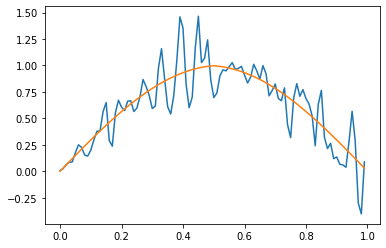

In [306]:
import matplotlib.pyplot as plt
solution_grid = np.reshape(solution_grid, (n))
plt.plot(grid_, solution_grid)
true_function = []
for val in grid_:
    true_function.append(f(val))
plt.plot(grid_, true_function)

In [256]:
N = 100000
grid = np.arange(0,1,1/N)
epsilon = (np.random.rand(1,N)-0.5)*0.02
data = []
for i in range(0,N):
    data.append(integrate.quad(lambda x: f(x), 0, grid[i])[0])

g = data#+epsilon
g = np.reshape(g, (N,1))

In [273]:
g = data+epsilon
g = np.reshape(g, (N,1))

In [274]:
def sol(x, g, gamma):
    N = g.shape[0]
    x1 = np.floor(N*(x+gamma))/N
    x2 = np.floor(N*(x-gamma))/N

    if int(x1*N)+1 <= N-1:
        
        return (1/(2*gamma))*((g[int(x1*N)]+((g[int(x1*N)+1]-g[int(x1*N)])*N*(x+gamma-x1)))-(g[int(x2*N)]+((g[int(x2*N)+1]-g[int(x2*N)])*N*(x-gamma-x2))))
    else:
        return 0

In [275]:
direct_sol = []
grid_ = np.arange(0,1,1/N)
for val in grid_:
    direct_sol.append(sol(val, g, 0.04))

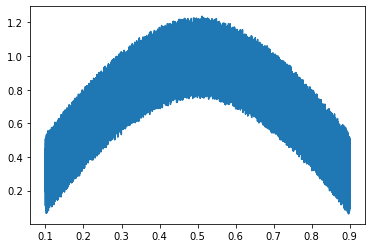

In [276]:
plt.plot(grid_[10000:90000], direct_sol[10000:90000])